# Projet : Consommation et production électrique en France

<img width=400 src="https://1.bp.blogspot.com/-_cw5mPFrxmc/XtuawSHRV0I/AAAAAAAAEWQ/52ff8l3-MKI0_ZdlJpwwyrH6tgh9diaOQCLcBGAsYHQ/s1600/uses-of-electricity-in-our-daily-life.jpg">
<p style="text-align: left"> Une  photo kitsch du réseau électrique </p>

## Présentation Du Dataset


<img src="./assets/image1.png" width="300"/>
<img src="./assets/image2.png" width="300"/>

<br>

**Informations issues du site (allez voir vous même également) :**

Ce jeu de données, rafraîchi une fois par jour, présente les données régionales de janvier 2013 à 2023. Elles sont issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. 

Vous y trouverez au pas 15 minutes :

- La consommation.
    
    
- La production selon les différentes filières composant le mix énergétique.


- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).


- Le solde des échanges avec les régions limitrophes.

<br>

<img src="./assets/image3.png" width="800"/>


## Objectifs et modalités de l'étude

**Modalités de l'étude :** 

- Vous travaillerez en groupe de 2 à 3. 
   
   
- Une présentation de votre travail sur une question sera effectuée en fin du projet. 
   
   
- Ce projet durera entre 3 et 5 jours

--- 

**Les objectifs de cette étude sont multiples :** 

- Apprendre à charger et manipuler des données réelles complexes avec Pandas. 


- Manipuler des séries temporelles. 


- Analyser des données pour répondre à une question exploratoire. 


- Présenter et vulgariser votre recherche exploratoire. 

---

**Notes sur les données RTE** 

- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata)

- https://www.rte-france.com/eco2mix 
- Données agrégées au niveau national : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/information/?disjunctive.nature 
- Données agrégées au niveau régional : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature



## Conseils & Remarques sur l'exploration des données

**L'importance de l'exploration des données**

La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données "réels"...  <br/> 
Cela fait partie du travail de data scientist, il faut s'y faire :-)

Histoire : <br>
It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time.  <br/> 
https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87


Autre histoire : <br>
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184


**Conseils généraux:**

- N'oubliez pas de reprendre les étapes d'exploration des donénes vues précédemment (projets "Arbres de Grenoble" et "Origine des prénoms") : afficher les informations sur vos dataframes, regardez les données, faites des sauvegardes intermédiaires (format .pkl par exemple), cherchez les outliers, les données manquantes, etc... 


- C'est une analyse exploratoire : **tatonnez**, **faîtes des graphiques**, ... 


- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données


- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

**An EDA checklist**

1. Quelle(s) question(s) essayez-vous de résoudre/de prouver que vous avez tort ?
2. De quel type de données disposez-vous et comment traitez-vous les différents types ?
3. Qu'est-ce qui manque dans les données et comment y faire face ?
4. Où sont les valeurs aberrantes et pourquoi devriez-vous vous en soucier ?
5. Comment pouvez-vous ajouter, modifier ou supprimer des fonctionnalités pour tirer le meilleur parti de vos données ?
        
https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

## Chargement et préparation des données

### &#x1F4A5; **To Do**


1. Charger les données nationales.
--- 
2. Regarder les colonnes, sélectionner les données intéressantes.
--- 
3. Les types inférés semblent-ils corrects ? Corriger si nécessaire (datetime, object, int, float, etc.)
---
5. Choisir des noms de colonnes plus faciles à manipuler (espaces, accents, ....)
---
6. Choisir un index adéquat pour votre dataframe. Les lignes ont un comportement étrange, choisissez les lignes qui vous arrangent.
---
7. Quelle période temporelle couvrent les données ?
---
8. Faîtes un choix par rapport aux valeurs manquantes. Les garder sous forme de NaN ou une autre valeur ?
---
9. Sauvegardez vos données sous format **pkl** pour ne pas devoir refaire les pré-traitements à chaque fois que vous redémarrez le kernel.  
---

&#x1F4A5; **Ressources**

- La doc de pandas.

- Voici quelques fonctions en vrac dont vous aurez besoin (read_csv,  info,  drop, to_datetime, astype, nunique, set_index, 


### Solutions 

In [40]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5

# Cette option nous permet de pouvoir afficher toutes les colonnes
pd.set_option('display.max_columns', 500)

In [41]:
# Chargement des données nationales
FOLDER = './data/'
file = 'eco2mix-national-cons-def.csv'
df_national = pd.read_csv(FOLDER + file, sep=';')
df_national.head(2)

/tmp/ipykernel_177244/1219535877.py:4: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_national = pd.read_csv(FOLDER + file, sep=';')


,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2015-12-16,03:00,2015-12-16T03:00:00+01:00,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,2791.0,-2970.0,1040.0,-9858.0,52.0,-1750.0,-2650.0,-2995.0,-3173.0,-1122.0,18.0,257.0,50.0,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
1,France,Données définitives,2015-12-16,03:15,2015-12-16T03:15:00+01:00,NaN,52950,53050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Les colonnes Date, Heure, Date et Heure devraient etre en datetime
# Gaz - Cogénération (MW) et Ech. comm. Allemagne-Belgique (MW) ne devraient pas être object. 
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378816 entries, 0 to 378815
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Périmètre                                  378816 non-null  object 
 1   Nature                                     378816 non-null  object 
 2   Date                                       378816 non-null  object 
 3   Heure                                      378816 non-null  object 
 4   Date et Heure                              378816 non-null  object 
 5   Consommation (MW)                          189407 non-null  float64
 6   Prévision J-1 (MW)                         378816 non-null  int64  
 7   Prévision J (MW)                           378816 non-null  int64  
 8   Fioul (MW)                                 189407 non-null  float64
 9   Charbon (MW)                               189407 non-null  float64
 10  Gaz (MW)

In [43]:
# On change le type de la colonne
df_national['Date et Heure'] = pd.to_datetime(df_national['Date et Heure'], utc=True)

# On supprime les colonnes Date et Heure qui ne vont pas servir (doublons)
df_national = df_national.drop(['Date', 'Heure'], axis='columns')

In [44]:
# Périmètre ne contient que la valeur 'France'
# Nature contient des données trop spécifiques pour nous (qualité de la collecte de données) 
df_national[['Périmètre', 'Nature']].nunique()

Périmètre    1
Nature       2
dtype: int64

In [45]:
# On va donc enlever ces deux colonnes 
df_national = df_national.drop(['Périmètre', 'Nature'], axis='columns')

In [46]:
# Date et heure devraient etre en index 
# (on aurait aussi pu mettre inplace=true)
df_national = df_national.set_index('Date et Heure')

In [47]:
df_national.head(4)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-16 02:00:00+00:00,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,2791.0,-2970.0,1040.0,-9858.0,52.0,-1750.0,-2650.0,-2995.0,-3173.0,-1122.0,18.0,257.0,50.0,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
2015-12-16 02:15:00+00:00,NaN,52950,53050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-16 04:00:00+00:00,52632.0,52300,52200,328.0,1274.0,2714.0,56200.0,4138.0,-1.0,2513.0,-3283.0,1053.0,-12304.0,52.0,-1650.0,-2650.0,-2995.0,-3173.0,-417.0,19.0,256.0,53.0,3.0,2023,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
2015-12-16 04:15:00+00:00,NaN,53300,53150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# On enlève les lignes où la consommation n'est pas définie
# (c'est un choix arbitraire)
df_national = df_national.dropna(axis='index', subset='Consommation (MW)')

In [49]:
df_national.head(4)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-16 02:00:00+00:00,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,2791.0,-2970.0,1040.0,-9858.0,52.0,-1750.0,-2650.0,-2995.0,-3173.0,-1122.0,18.0,257.0,50.0,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
2015-12-16 04:00:00+00:00,52632.0,52300,52200,328.0,1274.0,2714.0,56200.0,4138.0,-1.0,2513.0,-3283.0,1053.0,-12304.0,52.0,-1650.0,-2650.0,-2995.0,-3173.0,-417.0,19.0,256.0,53.0,3.0,2023,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
2015-12-16 06:00:00+00:00,63733.0,64000,63300,348.0,2263.0,5308.0,58001.0,4024.0,-1.0,3728.0,-546.0,996.0,-10388.0,70.0,-1650.0,-2100.0,-3150.0,-3135.0,52.0,19.0,279.0,50.0,3.0,2103,3167.0,35.0,2716.0,1011.0,0.0,537.0,238.0,222.0
2015-12-16 10:00:00+00:00,67650.0,67000,66800,351.0,2057.0,6687.0,58324.0,3415.0,1215.0,6342.0,-41.0,960.0,-11661.0,69.0,-1850.0,-2100.0,-3150.0,-3135.0,-2049.0,17.0,279.0,54.0,3.0,2075,4574.0,35.0,3440.0,1678.0,1224.0,503.0,239.0,218.0


In [50]:
# Quelle période temporelle couvrent les données ? 

debut = df_national.index.min()
fin = df_national.index.max()

print(f"""
Les données vont de {debut} à {fin}
""")


Les données vont de 2011-12-31 23:00:00+00:00 à 2023-01-31 22:30:00+00:00



In [51]:
# Les index ne sont pas rangés. Faisons le 
df_national = df_national.sort_index()

In [52]:
# Maintenant on est content.e.s, tout est bien rangé. 
df_national.head(3)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,58315.0,58200,58200,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940.0,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 23:30:00+00:00,58315.0,57200,56900,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:00:00+00:00,56231.0,55200,55100,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,-9993.0,34.0,-1750.0,-1400.0,-862.0,-2625.0,-2714,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# J'enlève tous les caractères qui m'empêchent d'avoir accès à la 'dot notation' pour la sélection de colonnes
col_names = ['Consommation', 'PrevisionJ_1', 'PrevisionJ', 'Fioul', 'Charbon',
       'Gaz', 'Nucleaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioenergies', 'Ech_physiques', 'Taux_CO2',
       'Ech_comm_Angleterre', 'Ech_comm_Espagne', 'Ech_comm_Italie',
       'Ech_comm_Suisse', 'Ech_comm_Allemagne_Belgique', 'Fioul_TAC',
       'Fioul_Cogeneration', 'Fioul_Autres', 'Gaz_TAC',
       'Gaz_Cogeneration', 'Gaz_CCG', 'Gaz_Autres',
       'Hydraulique_Fil_de_eau_et_éclusée', 'Hydraulique_Lacs',
       'Hydraulique_STEP_turbinage', 'Bioenergies_Dechets',
       'Bioenergies_Biomasse', 'Bioenergies_Biogaz']

df_national.columns = col_names

In [54]:
# Les colonnes ont des noms plus pratiques
df_national.head(3)

,Consommation,PrevisionJ_1,PrevisionJ,Fioul,Charbon,Gaz,Nucleaire,Eolien,Solaire,Hydraulique,Pompage,Bioenergies,Ech_physiques,Taux_CO2,Ech_comm_Angleterre,Ech_comm_Espagne,Ech_comm_Italie,Ech_comm_Suisse,Ech_comm_Allemagne_Belgique,Fioul_TAC,Fioul_Cogeneration,Fioul_Autres,Gaz_TAC,Gaz_Cogeneration,Gaz_CCG,Gaz_Autres,Hydraulique_Fil_de_eau_et_éclusée,Hydraulique_Lacs,Hydraulique_STEP_turbinage,Bioenergies_Dechets,Bioenergies_Biomasse,Bioenergies_Biogaz
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,58315.0,58200,58200,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940.0,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 23:30:00+00:00,58315.0,57200,56900,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:00:00+00:00,56231.0,55200,55100,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,-9993.0,34.0,-1750.0,-1400.0,-862.0,-2625.0,-2714,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
# En essayant ça : 
# pd.to_numeric(df_national.Ech_comm_Allemagne_Belgique)
# On obtient une erreur : ValueError: Unable to parse string "ND" at position 4078
# On va donc les transformer en NaN d'abord 

# Il aurait fallu le faire au chargement du dataframe, ça aurait été plus simple 
# Mais moins pédagogique ! 

# On importe juste pour avoir accès aux nans...
import numpy as np

# On transforme les ND en NaN
df_national = df_national.replace('ND', np.nan)

# On transforme tout le monde en float
df_national = df_national.astype('float64')

# Executer df_national.info() ppour vérifier que tout va bien. 

In [56]:
print(f"""
valeur min dans le dataframe : {df_national.min().min()}
valeur max dans le dataframe : {df_national.max().max()}
""")


valeur min dans le dataframe : -17891.0
valeur max dans le dataframe : 102700.0



In [57]:
# Valeurs que peux prendre un float 32, on est large ! 
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [58]:
# On transforme tout le monde en float32
# On gagne 50% de mémoire
df_national = df_national.astype('float32')

In [59]:
# On sauvegarde nos traitements, pour ne pas avoir à tout refaire
df_national.to_pickle('data_clean.pkl')

## Exploration du dataset National

### Réflexion

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et explorer les premières statistiques descriptives : 
- Quelles questions vous posez-vous sur les données ? 

- Qu'avez-vous envie d'explorer ? Soyez créatifs !

### Mise en application

&#x1F4A5; **To Do**
    
L'objectif ici est de **comprendre les données** présentes dans le dataset national que vous avez créé. 

---
- **Simplifiez** le DataFrame : regardez vos colonnnes, cherchez à les comprendre et rassemblez celles que vous pouvez rassembler. 
---
- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

---
- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydrayulique, solaire, ...) 
  
---
- **Autonomie électrique** : comparer la production totale française à la consommation totale. Quelle est le taux d'indépendance énergétique de la france au cours du temps (i.e. la proportion du temps où la France est autonome en énergie).
   
---
- **Equilibre du réseau électrique** : Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence.
Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 

---
- **Analyser la saisonnalité des données** :
    - Comparer les mois de l'année entre eux.
    - Printenps vs Eté vs Automne vs Hiver 

---
- **Impact des sources primaires de production sur le Taux de CO2** :
    - Corrélez les données entre elles et déduisez-en l'impact positif ou négatif de chacune des sources de production
 
---
- **Géopolitique** :
    - Quel a été l'impact du COVID et de la guerre en Ukraine sur le réseau électrique ?

---
&#x1F4A5; **Aide**
- ressource : https://www.statistiques.developpement-durable.gouv.fr/edition-numerique/bilan-energetique-2020/
- `pandas.DataFrame.rolling` vous aidera à afficher vos données et en comprendre les tendances. 
- Les `pandas.Grouper` vous aideront pour grouper les données temporelles.
- la méthode `.plot()` fonctionne parfaitement avec un datetime en index
- si vous utilisez un multi-index, la méthode `pandas.DataFrame.swaplevel` peut vous aider
- attention aux `NaN` pour les plots.

### Solutions

#### Affichez vos données pour mieux les comprendre

In [60]:
df_national = pd.read_pickle('data_clean.pkl')

##### Affichage : Consommation 1ère semaine de Janvier 2013

<Axes: xlabel='Date et Heure'>

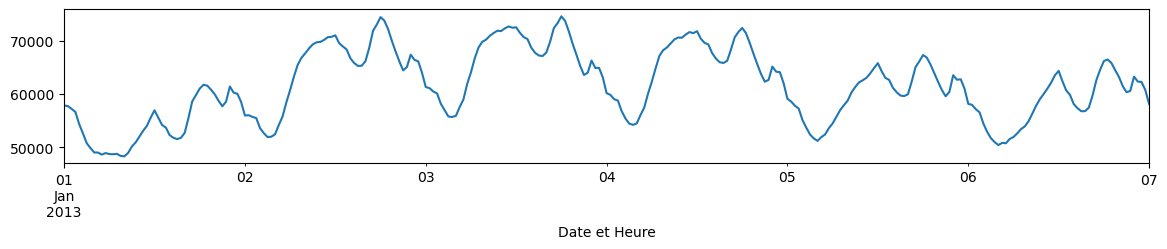

In [61]:
# Option 1 : En utilisant query
start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)

df_national \
    .query(' @start_date <= index <= @end_date ') \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

<Axes: xlabel='Date et Heure'>

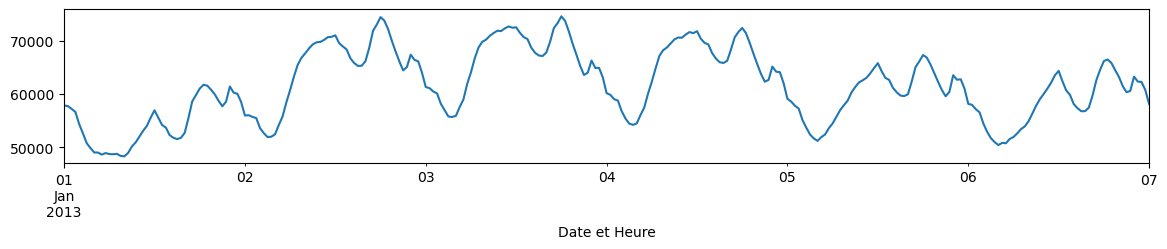

In [62]:
# Option 2 : en utilisant loc
start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)

df_national \
    .loc[(start_date <= df_national.index) & (df_national.index <= end_date)] \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

<Axes: xlabel='Date et Heure'>

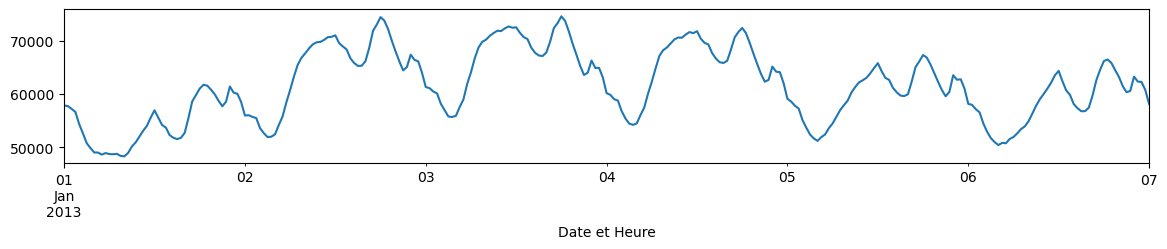

In [63]:
# Option 3 : avec date_range

start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)
dates = pd.date_range(start=start_date, end=end_date, freq='30min')

df_national \
    .loc[df_national.index.isin(dates)] \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

<Axes: xlabel='Date et Heure'>

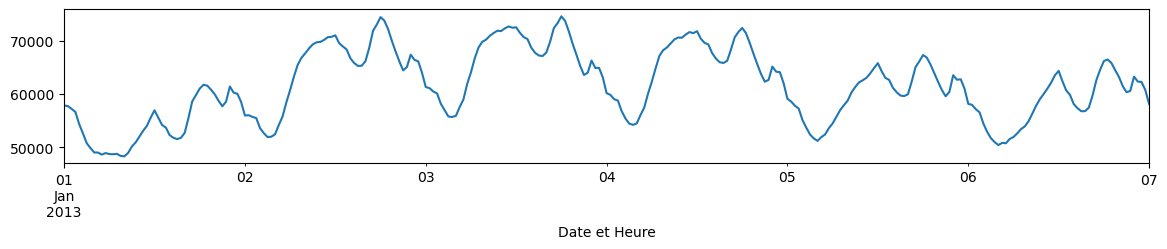

In [64]:
# Option 4 : avec date_range et query
start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)

dates = pd.date_range(start=start_date, end=end_date, freq='30min')

df_national \
    .query('index in @dates') \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

##### Affichage : Consommation au mois de Janvier 2013

<Axes: xlabel='Date et Heure'>

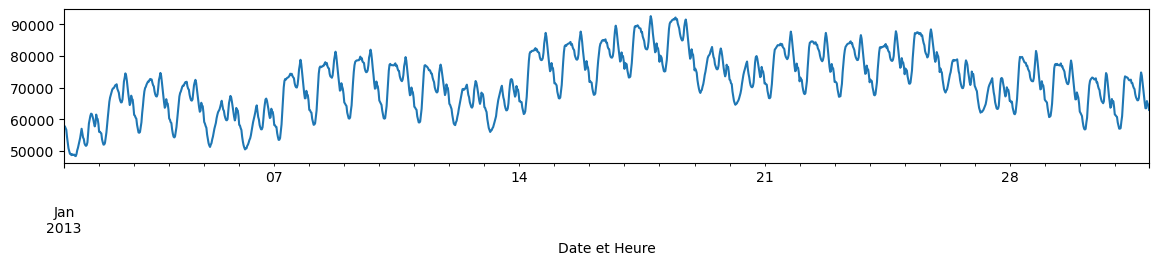

In [65]:
df_national.Consommation.loc['Jan-2013'].plot(figsize=(14, 2))

##### Comparaison entre les mois de Janvier 2013 et 2014

<Axes: xlabel='Date et Heure'>

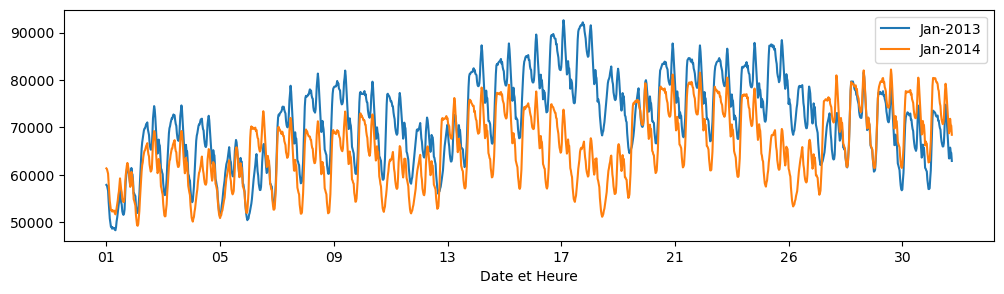

In [66]:
pd.DataFrame(
    index=df_national.Consommation.loc['Jan-2013'].index.strftime('%d'),
    data={
        "Jan-2013": df_national.Consommation.loc['Jan-2013'].values,
        "Jan-2014": df_national.Consommation.loc['Jan-2014'].values
    }
).plot(
    figsize=(12, 3)
)

Text(0.5, 1.0, 'Consumption 2013 vs. 2014')

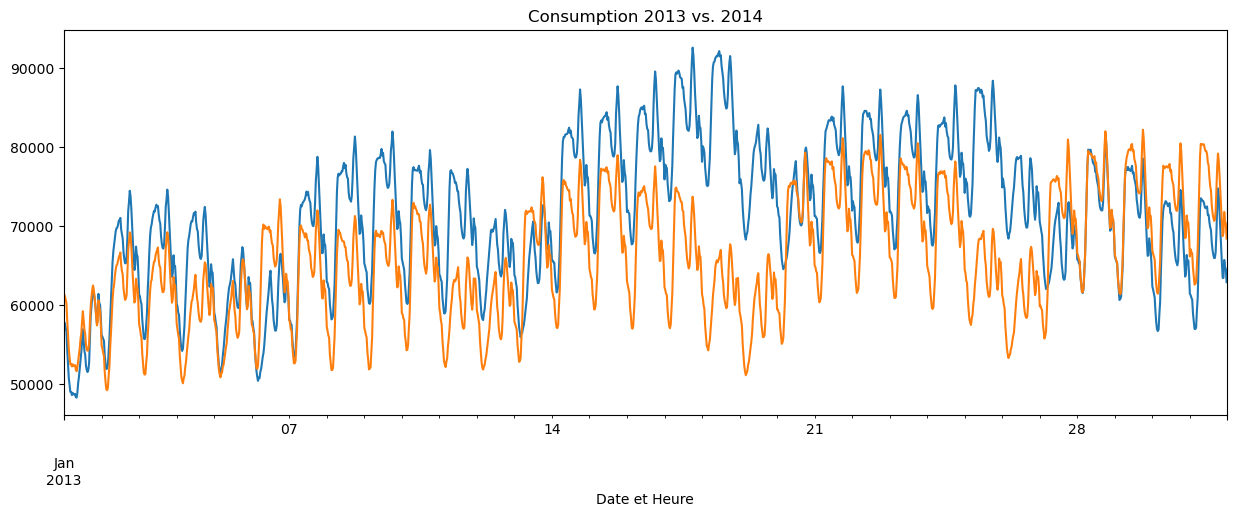

In [67]:
df_january = df_national.loc[(df_national.index.month_name() == 'January') & (
    df_national.index.year == 2013)]

df_january_2014 = df_national.loc[(
    df_national.index.month_name() == 'January') & (df_national.index.year == 2014)]

fig, ax = plt.subplots()
df_january.Consommation.dropna().plot(ax=ax)
df_january_2014.index = df_january_2014.index - pd.DateOffset(years=1)
df_january_2014.Consommation.dropna().plot(ax=ax)

ax.set_title("Consumption 2013 vs. 2014")

#### Mix énergétique

##### Visualisation des séries temporelles 


Tracer la production des différentes sources. 

Quelle est la source de production largement majoritaire ?

Regardez bien vos colonnnes, cherchez à comprendre les colonnes que vous pouvez rassembler et sommer. 

In [68]:
# Trop de colonnes, on va s'intéresser à moins de détails
df_national.columns

Index(['Consommation', 'PrevisionJ_1', 'PrevisionJ', 'Fioul', 'Charbon', 'Gaz',
       'Nucleaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioenergies', 'Ech_physiques', 'Taux_CO2', 'Ech_comm_Angleterre',
       'Ech_comm_Espagne', 'Ech_comm_Italie', 'Ech_comm_Suisse',
       'Ech_comm_Allemagne_Belgique', 'Fioul_TAC', 'Fioul_Cogeneration',
       'Fioul_Autres', 'Gaz_TAC', 'Gaz_Cogeneration', 'Gaz_CCG', 'Gaz_Autres',
       'Hydraulique_Fil_de_eau_et_éclusée', 'Hydraulique_Lacs',
       'Hydraulique_STEP_turbinage', 'Bioenergies_Dechets',
       'Bioenergies_Biomasse', 'Bioenergies_Biogaz'],
      dtype='object')

In [69]:
# On ne va garder que l'aggrégation de certaines colonnes
columns_of_interest = ['Consommation', 'Fioul', 'Charbon',
                       'Gaz', 'Nucleaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
                       'Bioenergies', 'Ech_physiques', 'Taux_CO2']

# Et on va aggréger les échanges commerciaux
echanges = ['Ech_comm_Angleterre',
            'Ech_comm_Espagne',
            'Ech_comm_Italie',
            'Ech_comm_Suisse',
            'Ech_comm_Allemagne_Belgique']

df_national_simple = df_national[columns_of_interest].copy()
df_national_simple['Echanges_commerciaux'] = df_national[echanges].sum(
    axis='columns')

df_national_simple.head(2)

,Consommation,Fioul,Charbon,Gaz,Nucleaire,Eolien,Solaire,Hydraulique,Pompage,Bioenergies,Ech_physiques,Taux_CO2,Echanges_commerciaux
Date et Heure,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-9377.0
2011-12-31 23:30:00+00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-9377.0


In [70]:
production = ['Fioul', 'Charbon', 'Gaz', 'Nucleaire', 'Eolien',
              'Solaire', 'Hydraulique', 'Bioenergies']

df_national_simple[production]

,Fioul,Charbon,Gaz,Nucleaire,Eolien,Solaire,Hydraulique,Bioenergies
Date et Heure,,,,,,,,
2011-12-31 23:00:00+00:00,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,719.0
2011-12-31 23:30:00+00:00,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,719.0
2012-01-01 00:00:00+00:00,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,721.0
2012-01-01 00:30:00+00:00,491.0,25.0,3832.0,51950.0,3526.0,0.0,7299.0,722.0
2012-01-01 01:00:00+00:00,492.0,25.0,3839.0,51625.0,3535.0,0.0,7159.0,719.0
...,...,...,...,...,...,...,...,...
2023-01-31 20:30:00+00:00,83.0,19.0,5395.0,42577.0,5961.0,0.0,8786.0,1104.0
2023-01-31 21:00:00+00:00,83.0,20.0,5134.0,42437.0,5886.0,0.0,7892.0,1101.0
2023-01-31 21:30:00+00:00,83.0,22.0,5404.0,42568.0,5923.0,0.0,7951.0,1114.0


In [75]:
df_national_simple.index

DatetimeIndex(['2011-12-31 23:00:00+00:00', '2011-12-31 23:30:00+00:00',
               '2012-01-01 00:00:00+00:00', '2012-01-01 00:30:00+00:00',
               '2012-01-01 01:00:00+00:00', '2012-01-01 01:30:00+00:00',
               '2012-01-01 02:00:00+00:00', '2012-01-01 02:30:00+00:00',
               '2012-01-01 03:00:00+00:00', '2012-01-01 03:30:00+00:00',
               ...
               '2023-01-31 18:00:00+00:00', '2023-01-31 18:30:00+00:00',
               '2023-01-31 19:00:00+00:00', '2023-01-31 19:30:00+00:00',
               '2023-01-31 20:00:00+00:00', '2023-01-31 20:30:00+00:00',
               '2023-01-31 21:00:00+00:00', '2023-01-31 21:30:00+00:00',
               '2023-01-31 22:00:00+00:00', '2023-01-31 22:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date et Heure', length=189407, freq=None)

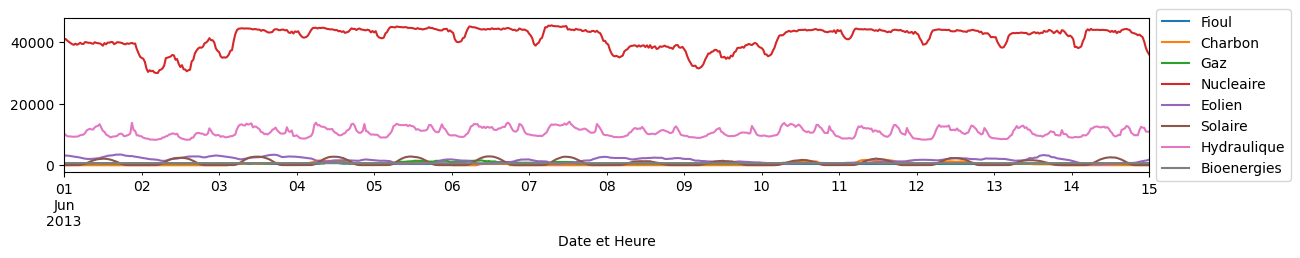

In [76]:
# On affiche toutes les sources d'énergies en regard les unes des autres
# Nucléaire est très, très majoritaire.

start_date = "2013-06-01"
end_date = "2013-06-15"
dates = pd.date_range(start=start_date, end=end_date, freq='30min', tz='UTC')

df_national_simple \
    .query('index in @dates') \
    .loc[:, production] \
    .plot(
        figsize=(14, 2)) \
    .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<Axes: xlabel='Date et Heure'>

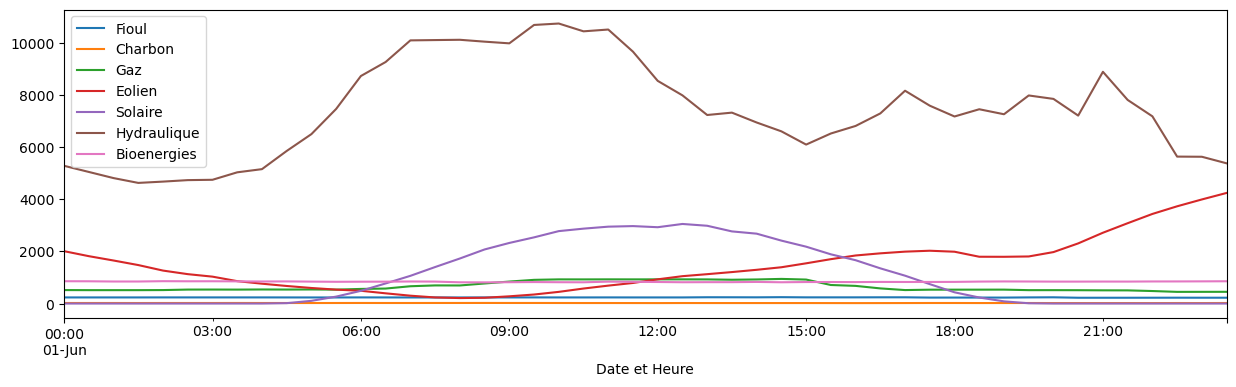

In [77]:
# On va enlever le nucléaire pour mieux voir les autres soruces d'énergie

production_hors_nucleaire = ['Fioul', 'Charbon', 'Gaz', 'Eolien',
                             'Solaire', 'Hydraulique', 'Bioenergies']

df_national_simple.loc['2015-06-01', production_hors_nucleaire].plot(
    figsize=(15, 4)
)

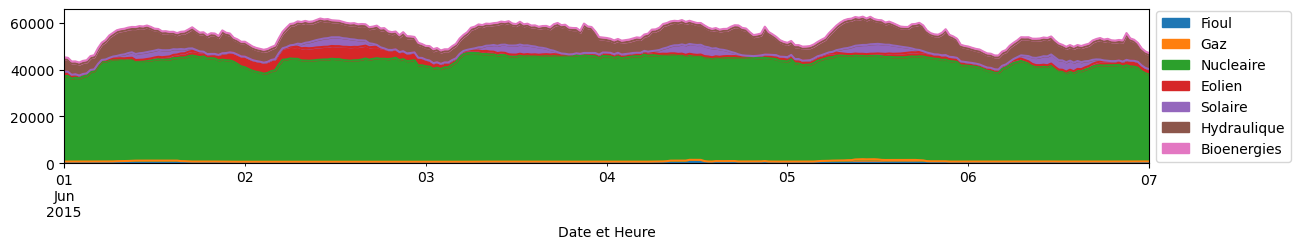

In [78]:
production = ['Fioul', 'Gaz', 'Nucleaire', 'Eolien',
              'Solaire', 'Hydraulique', 'Bioenergies']

start_date = "2015-06-01"
end_date = "2015-06-7"
dates = pd.date_range(start=start_date, end=end_date, freq='30min', tz='UTC')

df_national_simple \
    .query('index in @dates') \
    .loc[:, production] \
    .plot.area(figsize=(14, 2)) \
    .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

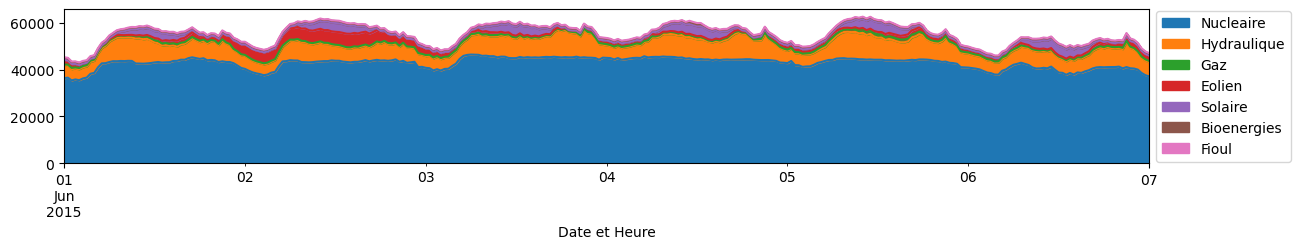

In [79]:
# On réorganise les colonnes pour mettre les plus gros producteurs en bas du plot

columns_sorted = df_national_simple.loc[:, production].sum(
).sort_values(ascending=False).index

df_national_simple \
    .query('index in @dates') \
    .loc[:, production] \
    .reindex(columns_sorted, axis=1) \
    .plot.area(figsize=(14, 2)) \
    .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

##### Statistiques sur les séries temporelles 

<Axes: >

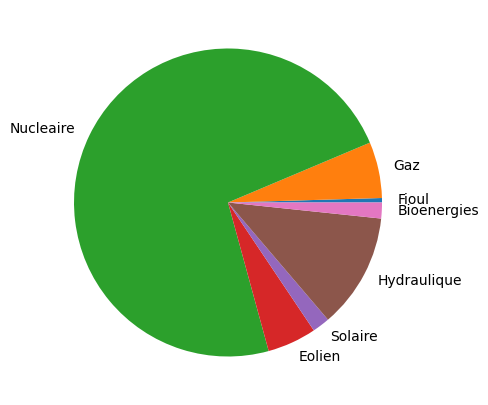

In [80]:
df_national_simple[production].sum().plot(kind='pie')

#### Autonomie électrique

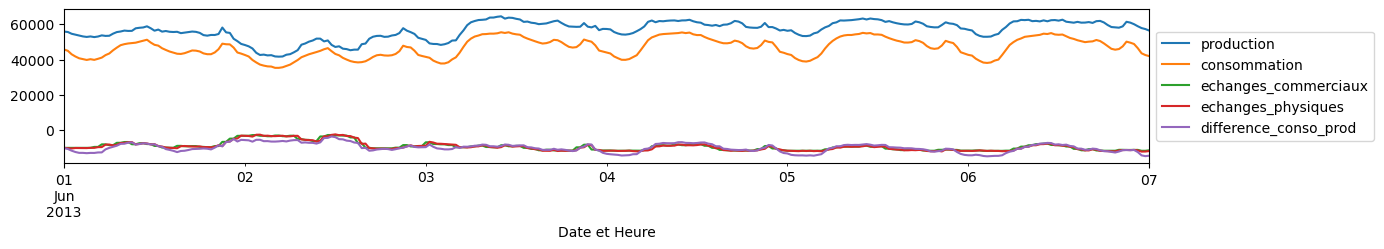

In [83]:
df = pd.DataFrame(
    index=df_national.index,
    data={
        'production': df_national[production].dropna().sum(axis='columns'),
        'consommation': df_national.Consommation.dropna(),
        'echanges_commerciaux': df_national_simple['Echanges_commerciaux'],
        'echanges_physiques': df_national_simple['Ech_physiques']
    }
)

df['difference_conso_prod'] = df['consommation'] - df['production']

start_date = "2013-06-01"
end_date = "2013-06-07"
dates = pd.date_range(start=start_date, end=end_date, freq='30min', tz='UTC')

df.query('index in @dates') \
  .plot(
    figsize=(14, 2)
).legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

On déduit du graph ci dessus, que les échanges correspondent à la différence entre la consommation et la production. 

Ils sont positifs quand ils sont dirigés vers la France.<br/>

#### Equilibre du réseau électrique ?

Si on injecte trop d'électricité sur le réseau par rapport à la quantité consommée, 
la fréquence électrique augmente.

Les centrales sont conçues pour fonctionner dans une certaine plage de fréquence, 

Risque de déconnexion du réseau après un certain temps.

https://www.energuide.be/fr/questions-reponses/pourquoi-le-reseau-electrique-doit-il-rester-en-equilibre/2136/

On peut essayer de vérifier que le bilan est (approximativement) nul. 


<Axes: xlabel='Date et Heure'>

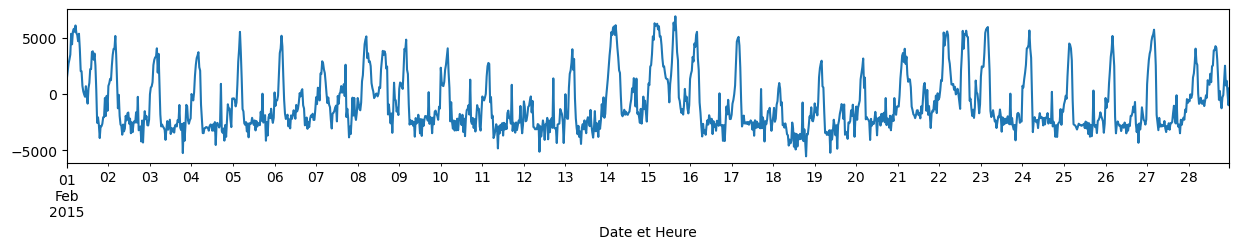

In [147]:
# Le bilan est approximativement nul ?

(
    df_national_simple[production].sum(axis='columns')
    + df_national_simple.Echanges_commerciaux
    - df_national_simple.Consommation
    - df_national_simple.Pompage

) .loc['2015-02'] \
  .plot(
      figsize=(15,2)
  )

#### Analyser la saisonnalité des données

In [166]:
# To do

#### Impact des sources primaires de production sur le Taux de CO2 

In [165]:
corr_matrix = df_national.corr()['Taux_CO2']
corr_matrix

Consommation                         0.552001
PrevisionJ_1                         0.558909
PrevisionJ                           0.553817
Fioul                                0.496654
Charbon                              0.809523
Gaz                                  0.643175
Nucleaire                            0.310224
Eolien                              -0.209049
Solaire                             -0.172226
Hydraulique                          0.029228
Pompage                              0.162546
Bioenergies                         -0.140345
Ech_physiques                        0.461845
Taux_CO2                             1.000000
Ech_comm_Angleterre                  0.357708
Ech_comm_Espagne                     0.268760
Ech_comm_Italie                      0.019909
Ech_comm_Suisse                      0.073638
Ech_comm_Allemagne_Belgique          0.412240
Fioul_TAC                            0.192109
Fioul_Cogeneration                   0.197370
Fioul_Autres                      

#### Géopolitique

In [167]:
# TO DO

<Axes: xlabel='Date et Heure'>

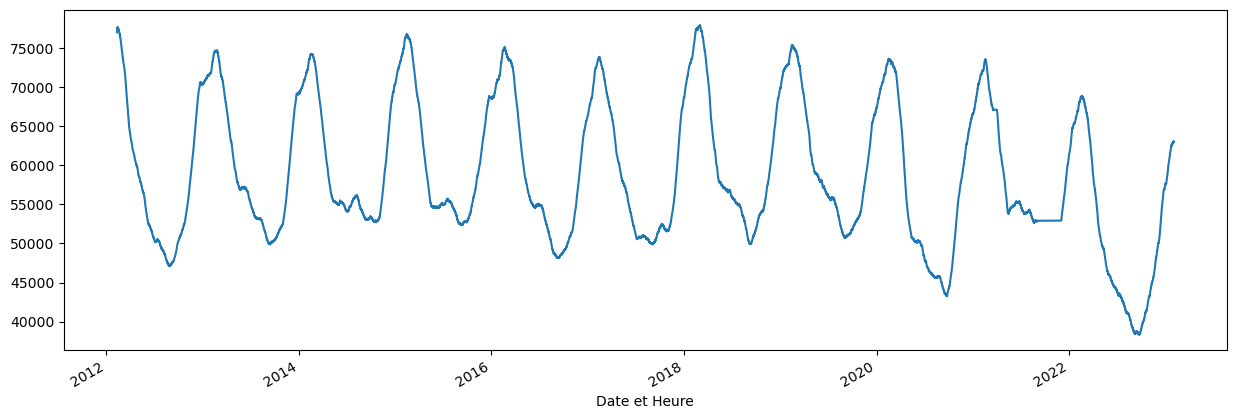

In [146]:
df_national.loc[:, production].sum(axis=1).rolling(window=2000).mean().plot()

<Axes: xlabel='Date et Heure'>

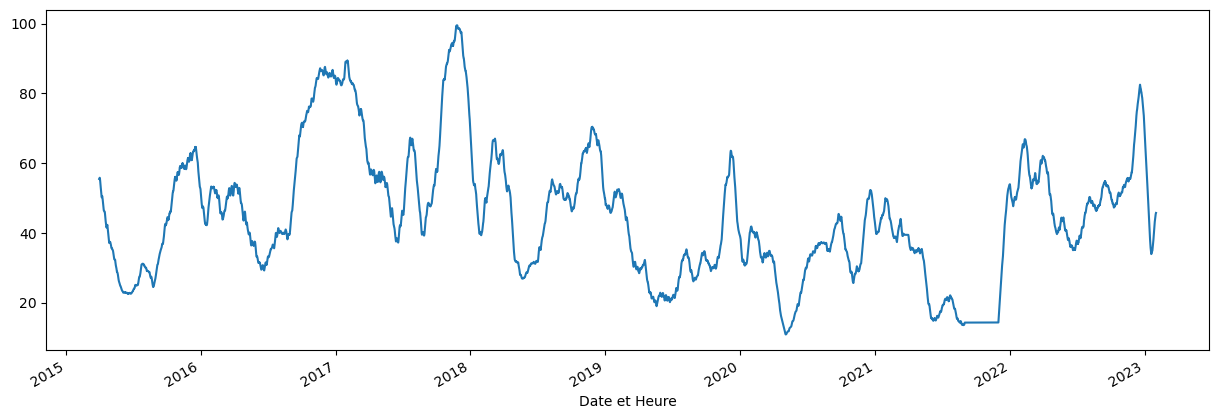

In [142]:
df_national.loc['1-Mar-2015':, 'Taux_CO2'].rolling(window=1500).mean().plot()